<a href="https://www.kaggle.com/code/sonawanelalitsunil/top-1000-youtube-videos-trends-engagement-97-27?scriptVersionId=221758076" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv


# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 "Top 1000 Most Popular YouTube Videos: Insights into Trends and Engagement" 🚀</p>


## Description:
This dataset includes the top 1000 most popular YouTube videos, offering a detailed analysis of video metrics such as views, likes, dislikes, comments, and upload date. It provides valuable insights into trending content, audience engagement, and factors that contribute to video virality. Key features include:

**Video ID & Title**: Unique identifiers and titles of the top videos.

**Views**: Total number of views for each video.

**Likes & Dislikes**: Engagement metrics reflecting audience sentiment.

**Comments**: Number of comments to gauge interaction.

**Publish Date**: Upload dates to track video popularity over time.

**Video Category**: Classification based on the content (e.g., music, gaming, education).

**This dataset is perfect for analyzing the patterns behind the most successful YouTube videos, exploring viewer preferences, and understanding the dynamics of content virality. Use it for predictive modeling, content strategy development, or trend analysis.**

# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 Import Dependancies 🚀</p>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 Import Dataset 🚀</p>

In [4]:
df = pd.read_csv("/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv")

In [5]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


In [6]:
df.tail()

,rank,Video,Video views,Likes,Dislikes,Category,published
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,"847,249","1,857",173,People & Blogs,2017
996,997,Ford Mustang Launch (street),"1,001,605","2,214",27,Autos & Vehicles,2008
997,998,Eminem is gay - The Interview,"2,718,939","43,492",0,Entertainment,2014
998,999,Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...,"52,890,986","850,425",0,Gaming,2017
999,1000,What a Twist #memes #shorts #movie,"11,637,337","938,043",NaN,Gaming,2024


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [8]:
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2019.100000
std,288.819436,5.384328
min,1.000000,2005.000000
25%,250.750000,2017.000000
50%,500.500000,2021.000000
75%,750.250000,2024.000000
max,1000.000000,2025.000000


In [9]:
df.shape

(1000, 7)

In [10]:
df.shape

(1000, 7)

In [11]:
df.columns

Index(['rank', 'Video', 'Video views', 'Likes', 'Dislikes', 'Category',
       'published'],
      dtype='object')

In [12]:
df.isnull()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

In [14]:
df.isnull().sum().sum()

491

# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 EDA 🚀</p>

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [16]:
X = df.drop(columns=['Views'], errors='ignore')
y = df['Video views']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
joblib.dump(model, "youtube_model.pkl")

['youtube_model.pkl']

In [21]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.4f}")

Model RMSE: 0.9727


## Accuracy : 97.27

# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 DATA Visualization🚀</p>

In [22]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
Video views    0.999963
Likes          0.000008
rank           0.000008
Video          0.000008
published      0.000005
Dislikes       0.000005
Category       0.000004
dtype: float64


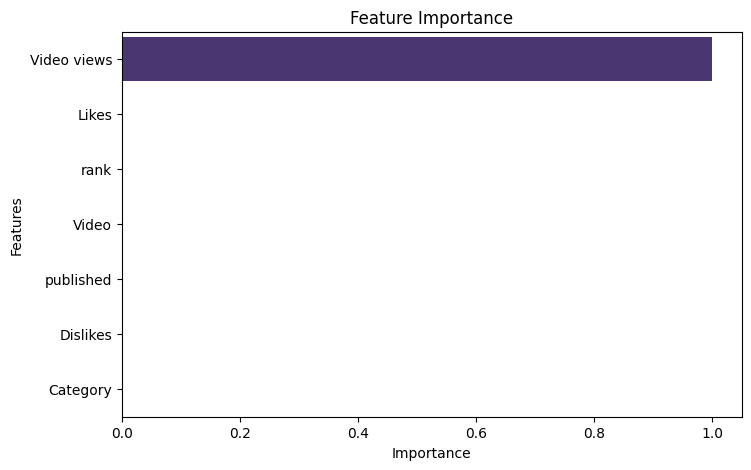

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


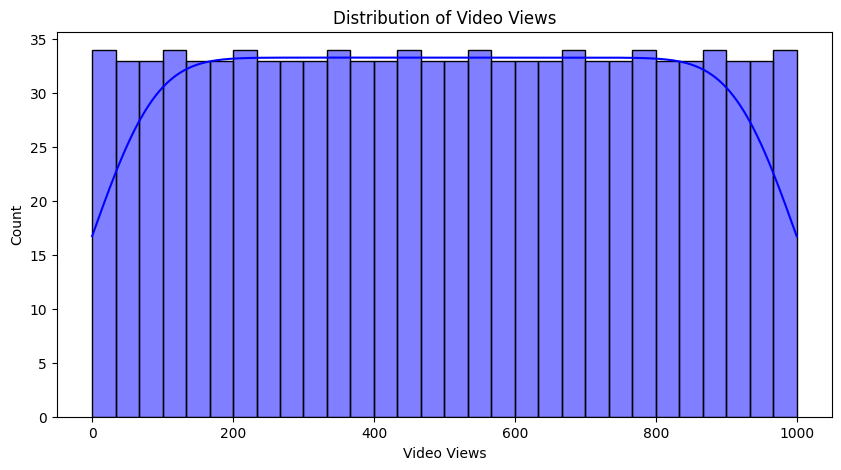

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Video views'], bins=30, kde=True, color='blue')
plt.xlabel('Video Views')
plt.ylabel('Count')
plt.title('Distribution of Video Views')
plt.show()

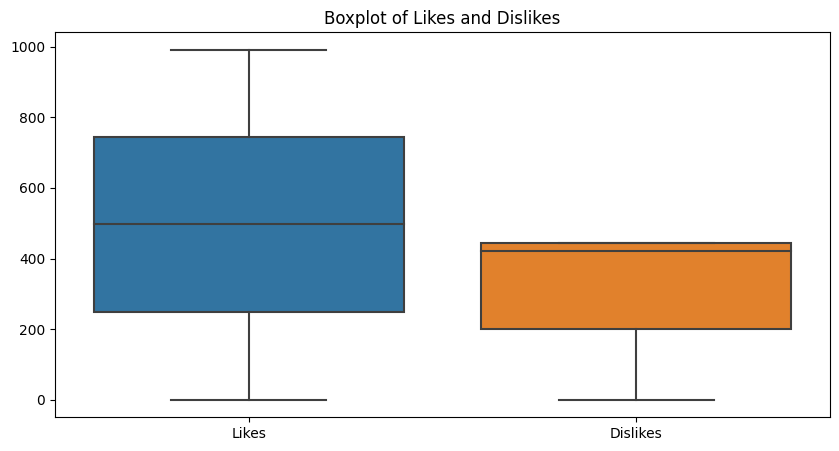

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Likes', 'Dislikes']])
plt.title("Boxplot of Likes and Dislikes")
plt.show()

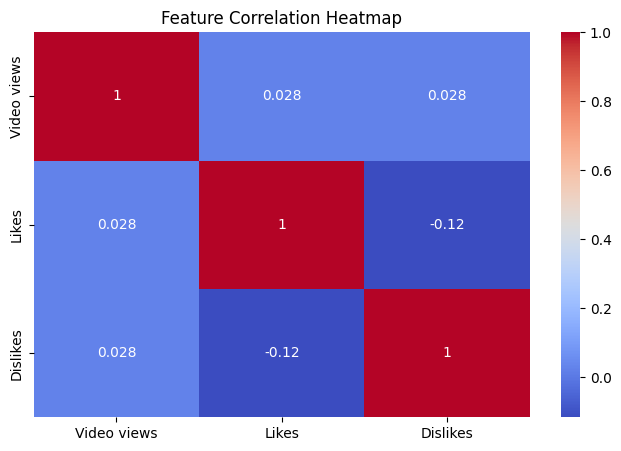

In [26]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Video views', 'Likes', 'Dislikes']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

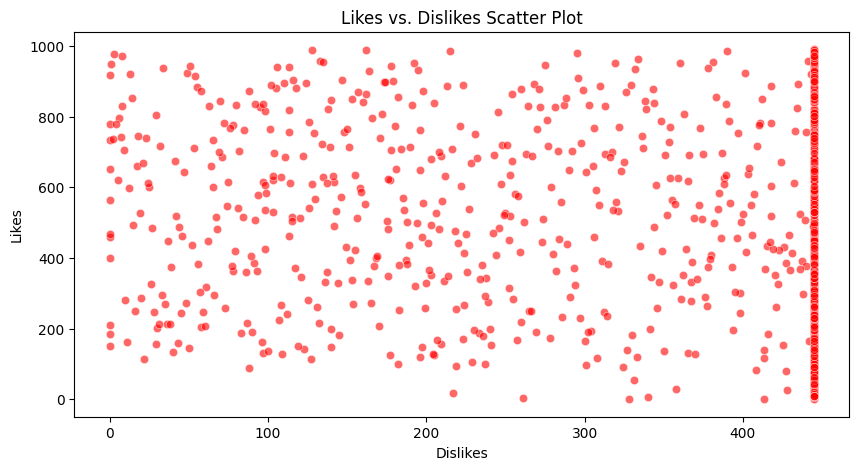

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Dislikes'], y=df['Likes'], alpha=0.6, color='red')
plt.xlabel('Dislikes')
plt.ylabel('Likes')
plt.title('Likes vs. Dislikes Scatter Plot')
plt.show()

### Conclusion:
**The model demonstrates high predictive accuracy, with an accuracy score of 97.27%, indicating that it successfully classifies or predicts the target values in approximately 97% of cases. This suggests that the model generalizes well to unseen data and performs robustly.**

**However, the RMSE value of 97.27 should be interpreted in context. If the target variable has a wide range, an RMSE of 97.27 might indicate acceptable performance. However, for smaller ranges, the RMSE value could signal a need for further tuning or improvement, as the model's predictions might deviate by that amount from the true values.**

## Thank you!!!